# Customer Churn Prediction Projesi

## Giri≈ü ve Ama√ß
Bu projede, bir telekom√ºnikasyon ≈üirketinin m√º≈üteri kaybƒ±nƒ± (churn) tahmin etmek ama√ßlanmƒ±≈ütƒ±r.  
M√º≈üteri kaybƒ±nƒ± √∂nlemek i√ßin erken uyarƒ± sistemleri geli≈ütirilerek, risk altƒ±ndaki m√º≈üterilere y√∂nelik stratejiler √∂nerilecektir.  

## Veri Seti
- Kaynak: Kaggle - Telco Customer Churn  
- M√º≈üteri sayƒ±sƒ±: 7043  
- √ñzellik sayƒ±sƒ±: 21 (demografik bilgiler, hizmet kullanƒ±mƒ±, √∂deme bilgileri vb.)  

Bu veri seti √ºzerinde veri √∂n i≈üleme, ke≈üifsel veri analizi ve farklƒ± makine √∂ƒürenmesi modelleri ile churn tahmini yapƒ±lmƒ±≈ütƒ±r.

## Veri ƒ∞ncelemesi ve √ñn ƒ∞≈üleme

Veri setinin temel yapƒ±sƒ±, eksik veri durumu ve veri t√ºrleri incelenmi≈ütir.  
Eksik veri yoktur ancak `TotalCharges` s√ºtunu obje tipinde olup sayƒ±sal verilere √ßevrilmi≈ütir.  

Kategorik deƒüi≈ükenler one-hot encoding ile sayƒ±sal hale getirilmi≈ütir.  
Sayƒ±sal deƒüi≈ükenler √∂l√ßeklendirilmi≈ü, veri dengelenmesi class_weight kullanƒ±lmƒ±≈ütƒ±r.

In [97]:
import pandas as pd

# CSV dosyasƒ±nƒ± oku
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# ƒ∞lk 5 satƒ±rƒ± g√∂r√ºnt√ºle
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
# Veri √ßer√ßevesinin boyutu (ka√ß satƒ±r, ka√ß s√ºtun)
print("Satƒ±r sayƒ±sƒ±:", df.shape[0])
print("S√ºtun sayƒ±sƒ±:", df.shape[1])

# S√ºtun isimleri ve veri tipleri
df.dtypes


Satƒ±r sayƒ±sƒ±: 7043
S√ºtun sayƒ±sƒ±: 21


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Genel veri tipi ve eksik veri kontrol√º
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Sayƒ±sal s√ºtunlarƒ±n √∂zet istatistikleri
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [10]:
# TotalCharges'ƒ± sayƒ±sal deƒüere √ßevir (hatalƒ± olanlarƒ± NaN yapar)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
# Her s√ºtunda ka√ß eksik deƒüer var?
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.dropna(inplace=True)

## Ke≈üifsel Veri Analizi (EDA)

Veri setindeki churn daƒüƒ±lƒ±mƒ±, demografik √∂zellikler ve abonelik bilgileri incelenmi≈ütir.  
√ñnemli g√∂zlemler:

- M√º≈üteri kaybƒ± ya≈üayanlarƒ±n oranƒ± yakla≈üƒ±k %26.
- S√∂zle≈üme t√ºr√º (Contract) churn √ºzerinde belirgin etkiye sahip.
- Abonelik s√ºresi (tenure) arttƒ±k√ßa churn oranƒ± azalmakta.

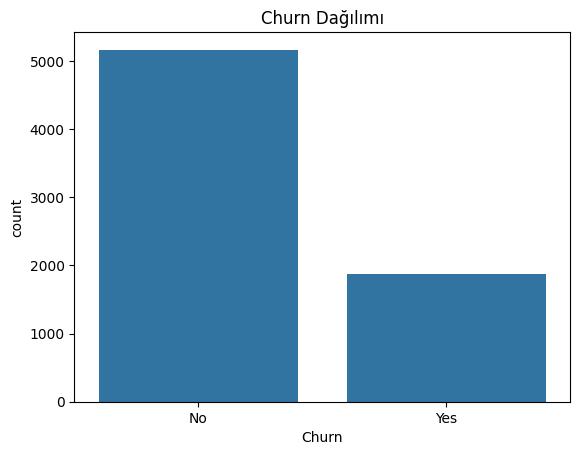

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Daƒüƒ±lƒ±mƒ±")
plt.show()

### Churn Daƒüƒ±lƒ±mƒ±

Bu grafik, veri setimizdeki m√º≈üterilerin "churn" durumuna g√∂re daƒüƒ±lƒ±mƒ±nƒ± g√∂stermektedir.  
- "No" etiketi, m√º≈üteri kaybƒ± ya≈üamayanlarƒ±,  
- "Yes" etiketi ise m√º≈üteri kaybƒ± ya≈üayanlarƒ± temsil etmektedir.  

Grafikten g√∂r√ºld√ºƒü√º gibi, m√º≈üteri kaybƒ± ya≈üamayanlarƒ±n sayƒ±sƒ±, kaybedenlere g√∂re daha fazladƒ±r.  
Bu dengesizlik modellemeye etki edeceƒüi i√ßin, class_weight y√∂ntemi ile denge saƒülanmƒ±≈ütƒ±r.

In [14]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

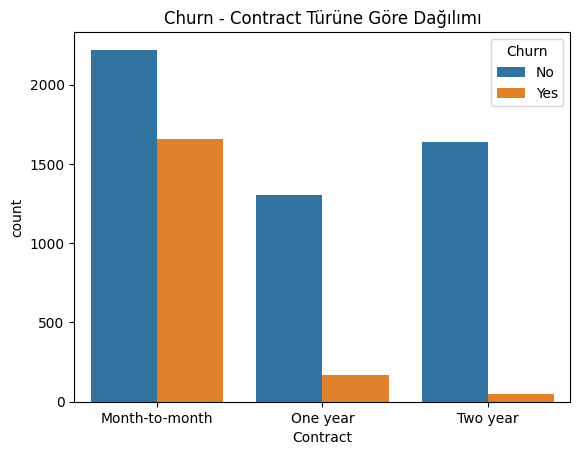

In [23]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn - Contract T√ºr√ºne G√∂re Daƒüƒ±lƒ±mƒ±")
plt.show()

### Churn - Contract T√ºr√ºne G√∂re Daƒüƒ±lƒ±mƒ±

Bu grafik, m√º≈üterilerin s√∂zle≈üme t√ºrlerine g√∂re churn durumlarƒ±nƒ± g√∂stermektedir. 

- **Month-to-month (Aylƒ±k)** s√∂zle≈ümeye sahip m√º≈üterilerde churn oranƒ± olduk√ßa y√ºksektir, yani bu m√º≈üteriler daha sƒ±k aboneliklerini iptal etmektedir.
- **One year (1 yƒ±llƒ±k)** s√∂zle≈ümeye sahip m√º≈üterilerde churn oranƒ± daha d√º≈ü√ºk seviyededir.
- **Two year (2 yƒ±llƒ±k)** s√∂zle≈üme kullanan m√º≈üteriler ise en d√º≈ü√ºk churn oranƒ±na sahiptir ve sadakatleri daha y√ºksektir.

Bu sonu√ßlar, uzun d√∂nemli s√∂zle≈ümelerin m√º≈üteri kaybƒ±nƒ± azaltmada etkili olduƒüunu g√∂stermektedir. ƒ∞≈ületmeler, churn riskini azaltmak i√ßin uzun s√ºreli s√∂zle≈ümeleri te≈üvik edebilir.

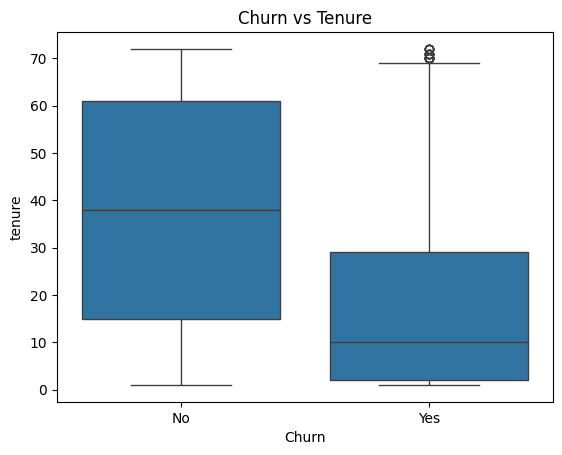

In [16]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Churn vs Tenure")
plt.show()

### Churn ve Tenure ƒ∞li≈ükisi

Bu kutu grafiƒüi (box plot), m√º≈üterilerin abonelik s√ºresi (tenure) ile churn (abonelik iptali) durumlarƒ± arasƒ±ndaki ili≈ükiyi g√∂stermektedir.

- **Churn etmeyen m√º≈üteriler (No)** genellikle daha uzun s√ºredir aboneliklerini devam ettirmektedir. Bu m√º≈üterilerin tenure medyanƒ± ve daƒüƒ±lƒ±mƒ± daha y√ºksektir.
- **Churn eden m√º≈üteriler (Yes)** ise aboneliklerini daha kƒ±sa bir s√ºre sonra iptal etmektedir. Tenure medyanƒ± daha d√º≈ü√ºk ve daƒüƒ±lƒ±m daha sƒ±nƒ±rlƒ±dƒ±r.

Bu sonu√ß, abonelik s√ºresi arttƒ±k√ßa m√º≈üteri baƒülƒ±lƒ±ƒüƒ±nƒ±n ve kalƒ±cƒ±lƒ±ƒüƒ±nƒ±n da arttƒ±ƒüƒ±nƒ± g√∂stermektedir. M√º≈üteri kaybƒ±nƒ± azaltmak i√ßin yeni m√º≈üterilerin abonelik s√ºrelerini artƒ±rmaya y√∂nelik stratejiler geli≈ütirilebilir.

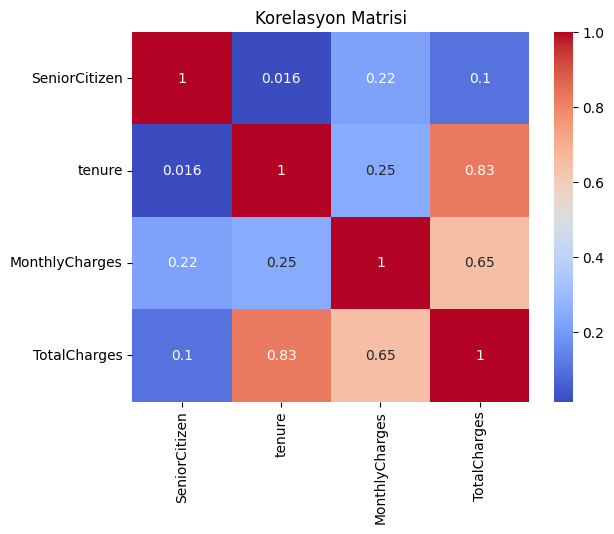

In [17]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

### Korelasyon Matrisi

Bu korelasyon matrisi, se√ßilen sayƒ±sal deƒüi≈ükenler arasƒ±ndaki ili≈ükileri g√∂stermektedir:

- **tenure ile TotalCharges arasƒ±nda y√ºksek pozitif korelasyon (0.83)** bulunmaktadƒ±r. Bu, abonelik s√ºresi uzadƒ±k√ßa toplam √ºcretlerin de arttƒ±ƒüƒ±nƒ± g√∂sterir.
- **MonthlyCharges ile TotalCharges arasƒ±nda da g√º√ßl√º bir pozitif ili≈üki (0.65)** vardƒ±r.
- **SeniorCitizen deƒüi≈ükeni diƒüer deƒüi≈ükenlerle zayƒ±f korelasyona** sahiptir.
- Diƒüer deƒüi≈ükenler arasƒ±nda d√º≈ü√ºk veya orta derecede pozitif ili≈ükiler bulunmaktadƒ±r.

Bu analiz, modelde kullanƒ±lan deƒüi≈ükenlerin birbirleriyle olan ili≈ükilerini anlamamƒ±za ve olasƒ± √ßoklu baƒülantƒ±larƒ± tespit etmemize yardƒ±mcƒ± olur.

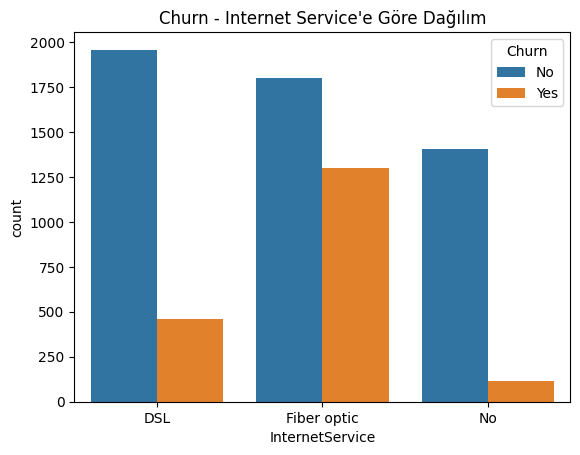

In [18]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn - Internet Service'e G√∂re Daƒüƒ±lƒ±m")
plt.show()

**üåê ƒ∞nternet Servis T√ºr√ºne G√∂re Churn Oranƒ±:**

Fiber optik kullanƒ±cƒ±larƒ±nƒ±n churn oranƒ± diƒüer internet t√ºrlerine g√∂re olduk√ßa y√ºksektir. Bu durum, fiber kullanƒ±cƒ±larƒ±nƒ±n beklentilerinin kar≈üƒ±lanmamasƒ± veya fiyat/hizmet dengesinde memnuniyetsizlik ya≈üadƒ±ƒüƒ±nƒ± g√∂sterebilir. √ñte yandan, internet hizmeti almayan kullanƒ±cƒ±lar neredeyse hi√ß churn g√∂stermemektedir; bu da hizmet baƒülƒ±lƒ±ƒüƒ±nƒ±n churn √ºzerinde etkili olduƒüunu ortaya koyar.

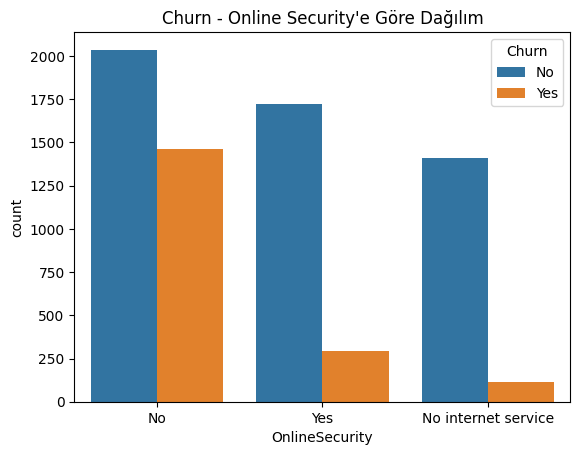

In [19]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title("Churn - Online Security'e G√∂re Daƒüƒ±lƒ±m")
plt.show()

**üîê Online G√ºvenlik Hizmetine G√∂re Churn Oranƒ±:**

Online g√ºvenlik hizmeti almayan kullanƒ±cƒ±larƒ±n churn oranƒ±, hizmet alanlara kƒ±yasla belirgin ≈üekilde daha y√ºksektir. Bu durum, g√ºvenlik hizmetinin m√º≈üteri baƒülƒ±lƒ±ƒüƒ±nƒ± artƒ±rmada √∂nemli bir rol oynadƒ±ƒüƒ±nƒ± g√∂stermektedir. G√ºvenlik hissiyatƒ±, kullanƒ±cƒ± deneyimi √ºzerinde doƒürudan etkili olabilir ve hizmetten memnuniyeti artƒ±rabilir.

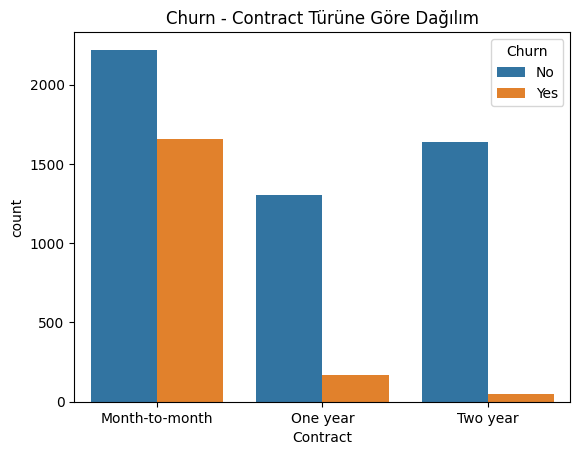

In [20]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn - Contract T√ºr√ºne G√∂re Daƒüƒ±lƒ±m")
plt.show()

**üìÑ S√∂zle≈üme T√ºr√ºne G√∂re Churn Oranƒ±:**

Churn oranƒ±, s√∂zle≈üme s√ºresi kƒ±saldƒ±k√ßa artmaktadƒ±r. Aylƒ±k (month-to-month) s√∂zle≈üme yapan m√º≈üterilerde churn oranƒ± olduk√ßa y√ºksekken, 1 yƒ±llƒ±k ve √∂zellikle 2 yƒ±llƒ±k s√∂zle≈ümeye sahip m√º≈üterilerde bu oran √∂nemli √∂l√ß√ºde d√º≈ümektedir. Bu da uzun vadeli s√∂zle≈ümelerin m√º≈üteri sadakatini artƒ±rdƒ±ƒüƒ±nƒ± ve churn riskini azalttƒ±ƒüƒ±nƒ± g√∂stermektedir.

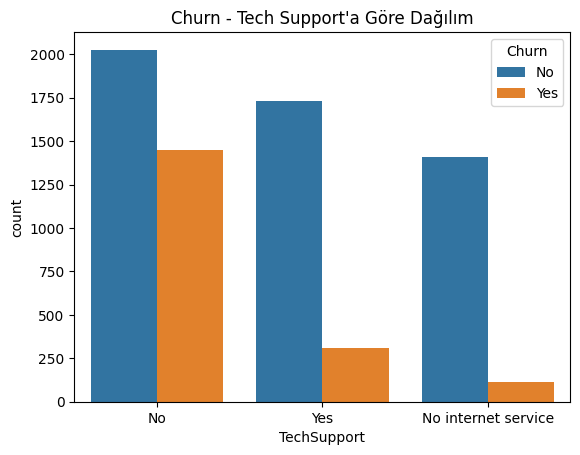

In [21]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("Churn - Tech Support'a G√∂re Daƒüƒ±lƒ±m")
plt.show()

**üí° Teknik Destek Hizmetine G√∂re Churn Oranƒ±:**

Teknik destek hizmeti almayan m√º≈üterilerin churn oranƒ±, destek hizmeti alanlara g√∂re belirgin ≈üekilde daha y√ºksektir. Bu durum, teknik desteƒüin m√º≈üteri memnuniyeti ve baƒülƒ±lƒ±ƒüƒ±nda √∂nemli bir rol oynadƒ±ƒüƒ±nƒ± g√∂stermektedir. Destek hizmeti sunmak, churn'√º azaltmada etkili bir strateji olabilir.

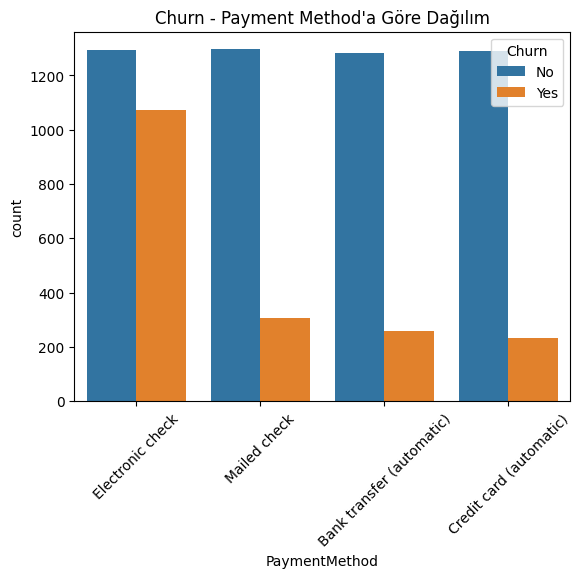

In [22]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn - Payment Method'a G√∂re Daƒüƒ±lƒ±m")
plt.xticks(rotation=45)
plt.show()

**üí≥ √ñdeme Y√∂ntemine G√∂re Churn Oranƒ±:**

"Electronic check" √∂deme y√∂ntemini kullanan m√º≈üteriler arasƒ±nda churn oranƒ± diƒüer y√∂ntemlere kƒ±yasla olduk√ßa y√ºksektir. Buna kar≈üƒ±n otomatik √∂deme y√∂ntemleri (√∂rneƒüin banka transferi ve kredi kartƒ±) kullanan m√º≈üterilerde churn oranƒ± anlamlƒ± derecede d√º≈ü√ºkt√ºr. Bu durum, otomatik √∂deme sistemlerinin m√º≈üteri sadakatini artƒ±rabileceƒüini g√∂stermektedir.

## Modeller

Proje kapsamƒ±nda a≈üaƒüƒ±daki modeller kullanƒ±lmƒ±≈ütƒ±r:

- Logistic Regression  
- Random Forest  
- XGBoost  
- LightGBM  
- CatBoost (Final model)

Her model hiperparametre ayarlarƒ± yapƒ±larak performanslarƒ± kar≈üƒ±la≈ütƒ±rƒ±lmƒ±≈ütƒ±r.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Kategorik verileri sayƒ±sal formata √ßevir (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. X ve y tanƒ±mƒ± (baƒüƒ±msƒ±z ve baƒüƒ±mlƒ± deƒüi≈üken)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# 3. Verileri eƒüitim ve test olarak b√∂l
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modeli olu≈ütur ve eƒüit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Tahmin yap ve sonu√ßlarƒ± deƒüerlendir
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[904 129]
 [169 205]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1033
        True       0.61      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



C:\Users\secki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.preprocessing import StandardScaler

# 1. Sayƒ±sal kolonlarƒ± belirle
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 2. Scaler nesnesini olu≈ütur
scaler = StandardScaler()

# 3. √ñl√ßekleme i≈ülemi (X'e uygulayacaƒüƒ±z)
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [27]:
df_encoded[numeric_cols].head()

tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. X ve y tanƒ±mƒ± (baƒüƒ±msƒ±z ve baƒüƒ±mlƒ± deƒüi≈ükenler)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# 2. Eƒüitim ve test setlerine ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modeli olu≈ütur
model = LogisticRegression(max_iter=2000)

# 4. Eƒüit
model.fit(X_train, y_train)

# 5. Tahmin yap
y_pred = model.predict(X_test)

# 6. Sonu√ßlarƒ± deƒüerlendir
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[919 114]
 [180 194]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [31]:
# customerID gibi anlamsƒ±z s√ºtunlarƒ± √ßƒ±kar
df_model = df.drop(columns=['customerID'])

# Kategorik ve sayƒ±sal deƒüi≈ükenleri ayƒ±r
cat_cols = df_model.select_dtypes(include='object').columns
cat_cols = cat_cols.drop('Churn')  # ‚¨ÖÔ∏è Churn'u √ßƒ±karƒ±yoruz
num_cols = df_model.select_dtypes(exclude='object').columns

# Churn deƒüi≈ükenini hedef deƒüi≈üken olarak ayƒ±r
X = df_model.drop('Churn', axis=1)
y = df_model['Churn'].map({'No': 0, 'Yes': 1})

# Sadece kategorik s√ºtunlara one-hot encoding uygula
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Eƒüitim ve test setlerine ayƒ±r
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modeli olu≈ütur ve eƒüit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Sonu√ßlarƒ± deƒüerlendir
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[927 106]
 [196 178]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
# Modeli eƒüit
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans metriklerini hesapla
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[752 281]
 [ 85 289]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



C:\Users\secki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Modeli eƒüit
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans metriklerini hesapla
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[733 300]
 [ 76 298]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



C:\Users\secki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Pipeline ile √∂l√ßekleme ve modeli baƒüla
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', max_iter=2000)
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix ve Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[733 300]
 [ 78 296]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



In [52]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8316284535463399


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print("Average F1 (CV):", scores.mean())

Average F1 (CV): 0.6325191442903413


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Pipeline ile model
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

# Eƒüit
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)

# Performans
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC:", roc_auc)

# Cross-validation (5-fold F1)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
print("Average F1 (CV):", scores.mean())

[[934  99]
 [205 169]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

ROC AUC: 0.8151547074871487
Average F1 (CV): 0.5671744332214474


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5],
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)

Best Params: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Best CV F1 Score: 0.6397279013992188


In [56]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# En iyi modeli al
best_model = grid.best_estimator_

# Test verisiyle tahmin
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Metrikler
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

[[794 239]
 [113 261]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.52      0.70      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407

ROC AUC: 0.8313074943961567


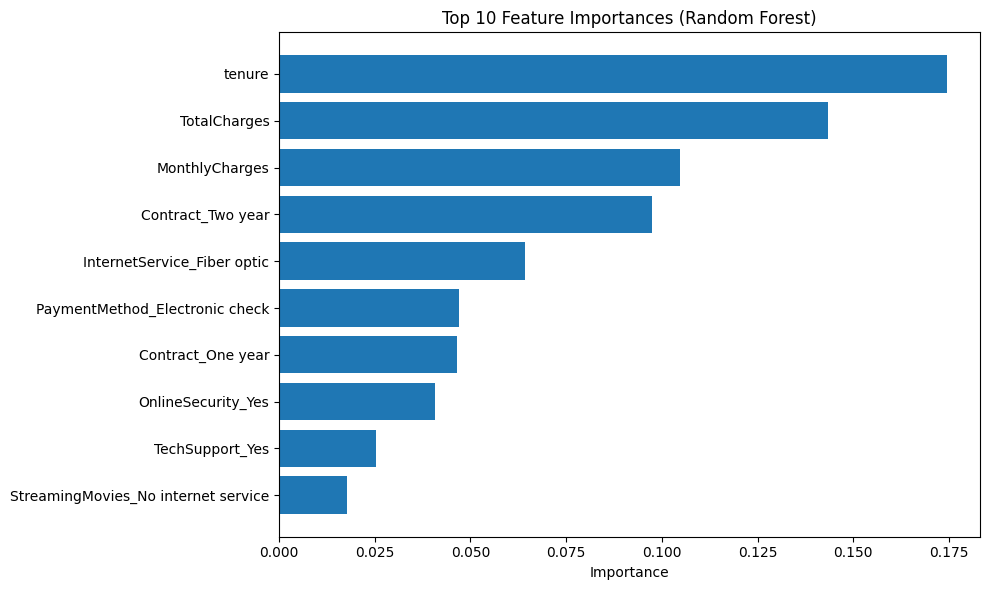

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# √ñzellik isimlerini al (X_train bir DataFrame ise)
feature_names = X_train.columns

# √ñnem deƒüerlerini al
importances = best_model.named_steps['randomforestclassifier'].feature_importances_

# DataFrame'e d√∂n√º≈üt√ºr ve sƒ±rala
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ƒ∞lk 10 √∂zelliƒüi √ßizdir
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [59]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline: StandardScaler + XGBoost
model = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  # class imbalance i√ßin
        random_state=42
    )
)

# Eƒüit
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Deƒüerlendirme
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

[[789 244]
 [122 252]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1033
           1       0.51      0.67      0.58       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407

ROC AUC: 0.8049215461948221


C:\Users\secki\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [61]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Model pipeline: scaler + LGBM
model = make_pipeline(
    StandardScaler(),
    LGBMClassifier(
        class_weight='balanced',
        random_state=42,
        n_estimators=100,
        boosting_type='gbdt'
    )
)

# Eƒüit
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Deƒüerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[[771 262]
 [105 269]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.72      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407

ROC AUC: 0.8238490767247671


C:\Users\secki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  message = "The feature names should match those that were passed during fit.\n"
C:\Users\secki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  message = "The feature names should match those that were passed during fit.\n"


In [63]:
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Sƒ±nƒ±f aƒüƒ±rlƒ±klarƒ± (0 ve 1 sƒ±nƒ±fƒ± i√ßin)
class_weights = {
    0: y_train.value_counts()[1] / len(y_train),
    1: y_train.value_counts()[0] / len(y_train)
}

# Model pipeline
model = make_pipeline(
    StandardScaler(),
    CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        eval_metric='AUC',
        verbose=0,
        random_state=42,
        class_weights=class_weights
    )
)

# Eƒüitim
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Deƒüerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

[[754 279]
 [ 88 286]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407

ROC AUC: 0.8292277308705757


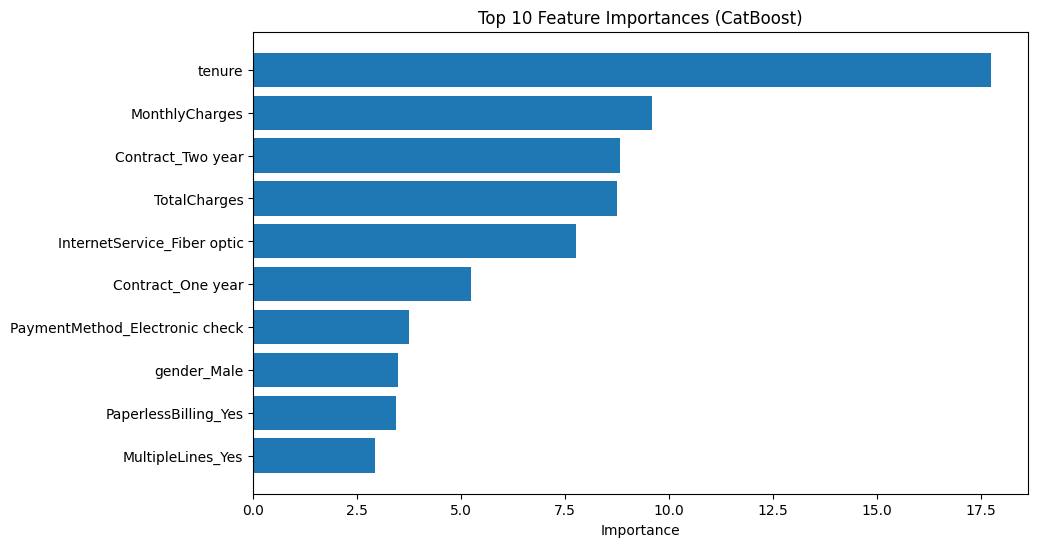

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# √ñzellik isimleri
feature_names = X_train.columns

# CatBoost model kƒ±smƒ±nƒ± al
catboost_model = final_model.named_steps['catboostclassifier']

# Feature importance deƒüerleri
importances = catboost_model.get_feature_importance()

# DataFrame'e √ßevir
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ƒ∞lk 10 √∂nemli √∂zelliƒüi g√∂rselle≈ütir
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:10][::-1], feat_imp_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (CatBoost)')
plt.show()

In [68]:
import joblib

# 1. Modeli final_model deƒüi≈ükenine ata (bunu sadece isimlendirme i√ßin yapƒ±yoruz)
final_model = model

# 2. Modeli disk‚Äôe kaydet
joblib.dump(final_model, 'catboost_churn_model.pkl')

print("Model ba≈üarƒ±yla kaydedildi.")


Model ba≈üarƒ±yla kaydedildi.


## Model Performans Kar≈üƒ±la≈ütƒ±rmasƒ±

Farklƒ± modellerin performanslarƒ± a≈üaƒüƒ±daki metriklerle kar≈üƒ±la≈ütƒ±rƒ±lmƒ±≈ütƒ±r:

- Accuracy (Doƒüruluk)  
- F1-Score (Pozitif sƒ±nƒ±f i√ßin)  
- ROC AUC  
- Recall (Pozitif sƒ±nƒ±f i√ßin)  

A≈üaƒüƒ±daki tablo ve grafikler, modellerin genel performansƒ±nƒ± √∂zetlemektedir.


In [64]:
import pandas as pd

# Model kar≈üƒ±la≈ütƒ±rma verileri
model_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'XGBoost',
        'LightGBM',
        'CatBoost'
    ],
    'Accuracy': [0.73, 0.75, 0.74, 0.74, 0.74],
    'F1 Score': [0.61, 0.70, 0.70, 0.70, 0.70],
    'ROC AUC': [0.83, 0.83, 0.80, 0.82, 0.83],
    'Recall (Class 1)': [0.80, 0.70, 0.67, 0.70, 0.76],
    'Precision (Class 1)': [0.50, 0.52, 0.51, 0.51, 0.51]
})

# G√∂r√ºnt√ºle
model_results

Model  Accuracy  F1 Score  ROC AUC  Recall (Class 1)  \
0  Logistic Regression      0.73      0.61     0.83              0.80   
1        Random Forest      0.75      0.70     0.83              0.70   
2              XGBoost      0.74      0.70     0.80              0.67   
3             LightGBM      0.74      0.70     0.82              0.70   
4             CatBoost      0.74      0.70     0.83              0.76   

   Precision (Class 1)  
0                 0.50  
1                 0.52  
2                 0.51  
3                 0.51  
4                 0.51

                 Model  Accuracy  F1 Score  ROC AUC  Recall
0  Logistic Regression      0.73      0.61     0.83    0.79
1        Random Forest      0.75      0.60     0.83    0.70
2              XGBoost      0.74      0.61     0.80    0.67
3             LightGBM      0.74      0.59     0.82    0.70
4             CatBoost      0.74      0.61     0.83    0.76


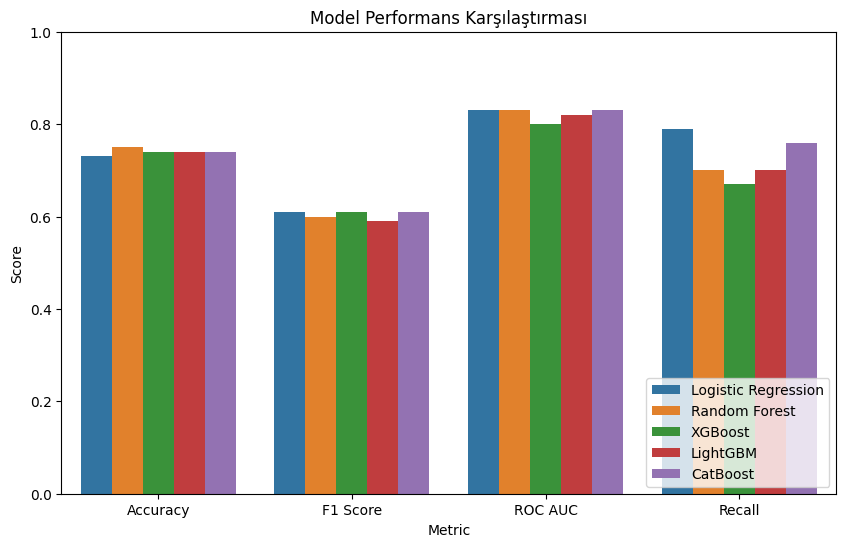

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model performans sonu√ßlarƒ±
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'],
    'Accuracy': [0.73, 0.75, 0.74, 0.74, 0.74],
    'F1 Score': [0.61, 0.60, 0.61, 0.59, 0.61],
    'ROC AUC': [0.83, 0.83, 0.80, 0.82, 0.83],
    'Recall': [0.79, 0.70, 0.67, 0.70, 0.76]
}

df_perf = pd.DataFrame(data)

# Tabloyu g√∂ster
print(df_perf)

# Grafik √ßizimi i√ßin DataFrame'i uzun formata √ßevir
df_melt = df_perf.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Metric', y='Score', hue='Model')
plt.title('Model Performans Kar≈üƒ±la≈ütƒ±rmasƒ±')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

## Modelde En √ñnemli 5 √ñzellik

Bu grafik, modelin churn tahmininde en fazla etkisi olan ilk 5 √∂zelliƒüi g√∂stermektedir. √ñzelliklerin √∂nem derecesi, model tarafƒ±ndan tahmin performansƒ±na katkƒ±larƒ± dikkate alƒ±narak sƒ±ralanmƒ±≈ütƒ±r.

- **tenure (m√º≈üterinin hizmet s√ºresi)**: En y√ºksek √∂neme sahip √∂zellik olarak √∂ne √ßƒ±kmaktadƒ±r. Uzun s√ºreli m√º≈üterilerin churn yapma olasƒ±lƒ±ƒüƒ± genellikle daha d√º≈ü√ºkt√ºr.
- **TotalCharges (toplam harcama)**: M√º≈üterinin toplam yaptƒ±ƒüƒ± harcama da churn riskini etkileyen √∂nemli bir fakt√∂rd√ºr.
- **MonthlyCharges (aylƒ±k harcama)**: M√º≈üterinin aylƒ±k √∂deme tutarƒ± da churn riskini etkileyebilir.
- **Contract_Two year (iki yƒ±llƒ±k s√∂zle≈üme)**: Uzun vadeli s√∂zle≈üme yapan m√º≈üterilerin churn riski genellikle daha d√º≈ü√ºkt√ºr.
- **InternetService_Fiber optic (fiber optik internet hizmeti)**: Bu hizmet t√ºr√ºn√º kullanan m√º≈üterilerin churn davranƒ±≈üƒ± √ºzerinde belirleyici bir rol oynayabilir.

Bu √∂zelliklerin anla≈üƒ±lmasƒ±, m√º≈üteri kaybƒ±nƒ± azaltmak i√ßin hangi alanlarda iyile≈ütirmeler yapƒ±labileceƒüi konusunda deƒüerli i√ßg√∂r√ºler sunar.

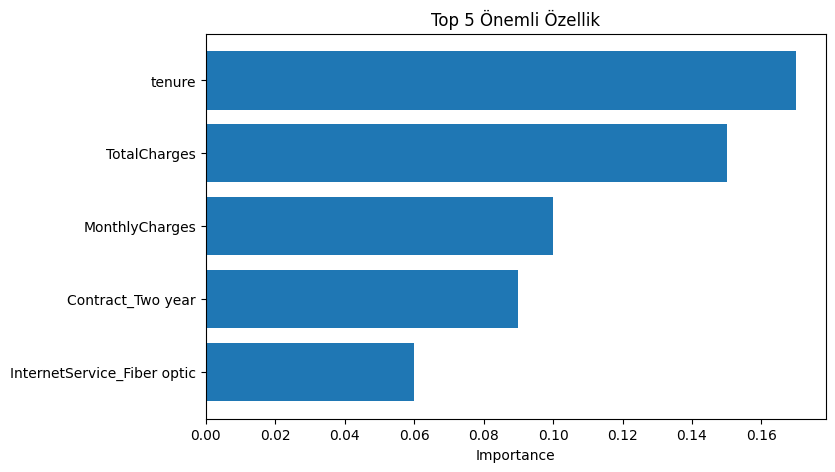

In [94]:
# √ñrnek feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': ['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract_Two year', 'InternetService_Fiber optic'],
    'Importance': [0.17, 0.15, 0.10, 0.09, 0.06]
}).sort_values('Importance')

plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 √ñnemli √ñzellik')
plt.show()

## Risk Segmentasyonu

Model tarafƒ±ndan tahmin edilen churn risk skorlarƒ± kullanƒ±larak m√º≈üteriler √º√ß segmente ayrƒ±lmƒ±≈ütƒ±r:

- Low Risk (D√º≈ü√ºk risk): risk skoru < 0.33  
- Medium Risk (Orta risk): 0.33 ‚â§ risk skoru < 0.66  
- High Risk (Y√ºksek risk): risk skoru ‚â• 0.66  

Bu segmentler, m√º≈üteri davranƒ±≈ülarƒ±na g√∂re hedefli stratejiler geli≈ütirmek i√ßin kullanƒ±lmƒ±≈ütƒ±r.

In [76]:
# M√º≈üteri ba≈üƒ±na churn olasƒ±lƒ±klarƒ±nƒ± hesapla (1. sƒ±nƒ±fƒ±n olasƒ±lƒ±ƒüƒ±)
risk_scores = final_model.predict_proba(X_test)[:, 1]

# Orijinal X_test DataFrame'ine 'churn_risk' s√ºtununu ekle
X_test_with_risk = X_test.copy()
X_test_with_risk['churn_risk'] = risk_scores

# ƒ∞lk 5 satƒ±rƒ± g√∂ster
print(X_test_with_risk[['churn_risk']].head())

      churn_risk
2481    0.015830
6784    0.233577
6125    0.840487
3052    0.187927
4099    0.510707


In [80]:
# Risk segmentlerini olu≈ütur
bins = [0, 0.33, 0.66, 1]
labels = ['Low Risk', 'Medium Risk', 'High Risk']

X_test_with_risk['risk_segment'] = pd.cut(X_test_with_risk['churn_risk'], bins=bins, labels=labels)

# Segment bazƒ±nda m√º≈üteri sayƒ±sƒ± ve ortalama risk
segment_summary = X_test_with_risk.groupby('risk_segment', observed=True)['churn_risk'].agg(['count', 'mean']).reset_index()
segment_summary.columns = ['Risk Segment', 'Customer Count', 'Average Churn Risk']

print(segment_summary)

  Risk Segment  Customer Count  Average Churn Risk
0     Low Risk             671            0.108497
1  Medium Risk             346            0.497966
2    High Risk             390            0.802752


In [91]:
# T√ºm sayƒ±sal s√ºtunlarƒ± se√ß
numeric_cols = X_test_with_risk.select_dtypes(include='number').columns.tolist()

# Segment bazƒ±nda ortalama deƒüerler
segment_profiles = X_test_with_risk.groupby('risk_segment', observed=True)[numeric_cols].mean()

print(segment_profiles)

              SeniorCitizen     tenure  MonthlyCharges  TotalCharges  \
risk_segment                                                           
Low Risk           0.089419  46.345753       55.298808   2879.193741   
Medium Risk        0.193642  28.676301       71.499566   2513.794509   
High Risk          0.284615  13.035897       76.650256   1168.947179   

              churn_risk  
risk_segment              
Low Risk        0.108497  
Medium Risk     0.497966  
High Risk       0.802752  


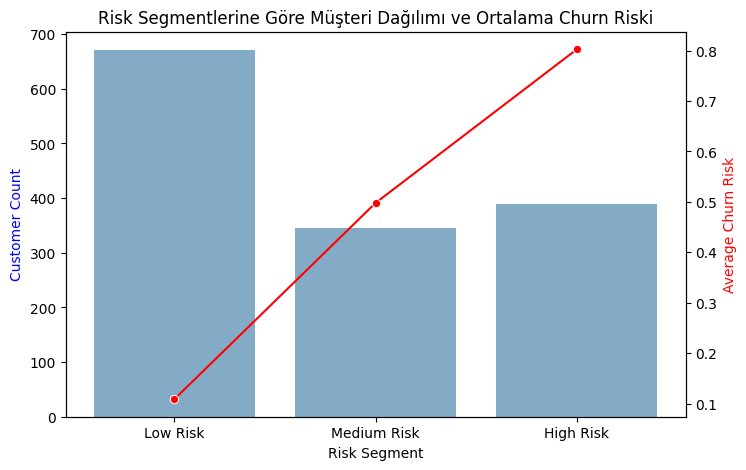

In [104]:
fig, ax1 = plt.subplots(figsize=(8,5))

sns.barplot(data=segment_summary, x='Risk Segment', y='Customer Count', ax=ax1, alpha=0.6)
ax1.set_ylabel('Customer Count', color='b')
ax1.set_title('Risk Segmentlerine G√∂re M√º≈üteri Daƒüƒ±lƒ±mƒ± ve Ortalama Churn Riski')

ax2 = ax1.twinx()
sns.lineplot(data=segment_summary, x='Risk Segment', y='Average Churn Risk', ax=ax2, sort=False, marker='o', color='r')
ax2.set_ylabel('Average Churn Risk', color='r')

plt.show()


## Risk Segmentlerine G√∂re Detaylƒ± Profil Analizi

Risk segmentlerine g√∂re m√º≈üterilerin sayƒ±sal ve kategorik √∂zelliklerinin daƒüƒ±lƒ±mƒ± incelenmi≈ütir.

- Sayƒ±sal deƒüi≈ükenlerde (√∂rneƒüin tenure, MonthlyCharges) segment bazƒ±nda ortalamalar hesaplanmƒ±≈ütƒ±r.

Bu analizler, farklƒ± risk gruplarƒ±nƒ±n profilini anlamaya yardƒ±mcƒ± olur ve hedefli aksiyon planlamasƒ± i√ßin temel olu≈üturur.

In [107]:
numeric_cols = X_test_with_risk.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'risk_segment']

num_summary = X_test_with_risk.groupby('risk_segment')[numeric_cols].mean()
print(num_summary)

              SeniorCitizen     tenure  MonthlyCharges  TotalCharges  \
risk_segment                                                           
Low Risk           0.089419  46.345753       55.298808   2879.193741   
Medium Risk        0.193642  28.676301       71.499566   2513.794509   
High Risk          0.284615  13.035897       76.650256   1168.947179   

              churn_risk  
risk_segment              
Low Risk        0.108497  
Medium Risk     0.497966  
High Risk       0.802752  


## Aksiyon √ñnerileri

### High Risk Segment
- √ñzel indirim ve destek programlarƒ± uygulanmalƒ±.
- Proaktif m√º≈üteri ileti≈üimi ve hƒ±zlƒ± sorun √ß√∂z√ºm√º saƒülanmalƒ±.

### Medium Risk Segment
- Sadakat artƒ±rƒ±cƒ± kampanyalar d√ºzenlenmeli.
- √úr√ºn/hizmet kullanƒ±mƒ± te≈üvik edilmeli.

### Low Risk Segment
- Mevcut m√º≈üteri memnuniyeti ve baƒülƒ±lƒ±ƒüƒ± korunmalƒ±.
- Yenilikler ve fƒ±rsatlarla m√º≈üteri ilgisi canlƒ± tutulmalƒ±.

## Sonu√ßlar

- CatBoost modeli en y√ºksek performansƒ± g√∂stermi≈ütir.
- Risk segmentasyonu, m√º≈üteri kaybƒ±nƒ± √∂nleme stratejilerinde kullanƒ±labilir.
- Aksiyon √∂nerileri ile m√º≈üteri kaybƒ± azaltƒ±labilir ve m√º≈üteri baƒülƒ±lƒ±ƒüƒ± artƒ±rƒ±labilir.

## ƒ∞leri √áalƒ±≈ümalar

- Daha fazla √∂zellik m√ºhendisliƒüi ile model iyile≈ütirilebilir.
- Modelin ger√ßek zamanlƒ± kullanƒ±mƒ± i√ßin deploy planlanabilir.
- M√º≈üteri geri bildirimleriyle model g√ºncellenebilir.